In [83]:
import tabula as t
import pandas as pd 

In [84]:
pdf_path = 'C:/Users/zeus/Desktop/Table Extraction/Office2.pdf'

# Use read_pdf to extract tables
tables = t.read_pdf(pdf_path, pages=[1, 2])

# Use convert_into to save tables to a CSV file
t.convert_into(pdf_path, 'C:/Users/zeus/Desktop/Table Extraction/Office.csv', output_format='csv', pages=[1, 2])

# Print a message after the conversion
print("Conversion to CSV completed successfully.")

#reading the csv file.
csv_path = 'C:/Users/zeus/Desktop/Table Extraction/Office.csv'
df = pd.read_csv(csv_path)

#remove the extra name row that got added from page 2.
df = df[df['Name'] != 'Name']

# drop the index column 
df = df.reset_index(drop= True)

#create a csv file which will be the updated one.
df.to_csv('C:/Users/zeus/Desktop/Table Extraction/Updated_Office.csv', index = False)


Conversion to CSV completed successfully.


In [85]:
# now this file has an addtion column generated while extracting out the data from the pdf file.
df.head(10)

,Name,Gender,Start date,Age,Designation,Office Location,Unnamed: 6,Salary
0,Airi Satou,Female,28-11-2008,33,Accountant,Tokyo,$,"1,62,700"
1,Ashton Cox,Male,12-01-2009,66,Junior Technical Author,San Francisco,$,"8 6,000"
2,Brenden Wagner,Male,07-06-2011,28,Software Engineer,San Francisco,$,"2,06,850"
3,Bruno Nash,Male,03-05-2011,38,Software Engineer,London,$,"1,63,500"
4,Cara Stevens,Female,06-12-2011,46,Sales Assistant,New York,$,"1,45,600"
5,Charde Marshall,Female,16-10-2008,36,Regional Director,San Francisco,$,"4,70,600"
6,Dai Rios,Male,26-09-2012,35,Personnel Lead,Edinburgh,$,"2,17,500"
7,Doris Wilder,Female,20-09-2010,23,Sales Assistant,Sydney,$,"8 5,600"
8,Fiona Green,Female,11-03-2010,48,Chief Operating Officer (COO),San Francisco,$,"8,50,000"
9,Gavin Cortez,Male,26-10-2008,22,Team Leader,San Francisco,$,"2,35,500"


In [86]:
df.drop('Unnamed: 6', axis = 1, inplace = True)
# so we have successfully dropped the column which is showing abnormality.

In [87]:
df.head(10)
#removed the anomality column

,Name,Gender,Start date,Age,Designation,Office Location,Salary
0,Airi Satou,Female,28-11-2008,33,Accountant,Tokyo,"1,62,700"
1,Ashton Cox,Male,12-01-2009,66,Junior Technical Author,San Francisco,"8 6,000"
2,Brenden Wagner,Male,07-06-2011,28,Software Engineer,San Francisco,"2,06,850"
3,Bruno Nash,Male,03-05-2011,38,Software Engineer,London,"1,63,500"
4,Cara Stevens,Female,06-12-2011,46,Sales Assistant,New York,"1,45,600"
5,Charde Marshall,Female,16-10-2008,36,Regional Director,San Francisco,"4,70,600"
6,Dai Rios,Male,26-09-2012,35,Personnel Lead,Edinburgh,"2,17,500"
7,Doris Wilder,Female,20-09-2010,23,Sales Assistant,Sydney,"8 5,600"
8,Fiona Green,Female,11-03-2010,48,Chief Operating Officer (COO),San Francisco,"8,50,000"
9,Gavin Cortez,Male,26-10-2008,22,Team Leader,San Francisco,"2,35,500"


In [88]:
df.info()
#no nulls or error columns is there. So the data wrangling is done. Now it is time to focus on calculations part.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             100 non-null    object
 1   Gender           100 non-null    object
 2   Start date       100 non-null    object
 3   Age              100 non-null    int64 
 4   Designation      100 non-null    object
 5   Office Location  100 non-null    object
 6   Salary           100 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


In [89]:
df.iloc[8]
# here is the one of the element from the dataframe.

Name                                 Fiona Green
Gender                                    Female
Start date                            11-03-2010
Age                                           48
Designation        Chief Operating Officer (COO)
Office Location                    San Francisco
Salary                                  8,50,000
Name: 8, dtype: object

In [90]:
df.dtypes
# here the data type are little messy so there is a need to assign a perfect name to each element 
# so that calculation don't show error while computation.

Name               object
Gender             object
Start date         object
Age                 int64
Designation        object
Office Location    object
Salary             object
dtype: object

In [91]:
df['Salary'] = df['Salary'].replace('[/ ,]','', regex = True).astype(float)
# in salary column we have seen some spacings and commas which is not acceptable for the calculation point of view,
# Hence Removed


The warning suggests that the default behavior of pd.to_datetime assumes the date format is in %Y-%m-%d format, but since you are providing it in %d-%m-%Y format, it's recommending you either specify dayfirst=True or provide a format to avoid ambiguity.

In [92]:
# df['Start date'] = pd.to_datetime(df['Start date'], format='%d-%m-%Y')
df['Start date'] = pd.to_datetime(df['Start date'], dayfirst=True).dt.strftime('%d-%m-%Y')
# df['Start date'] = df['Start date'].replace('/00:00:00', '')

In [93]:
convert_dict = {'Name' : str,
                'Designation': str,
                'Office Location': str,
                'Age': int,
                'Salary' : int,
                'Gender' : str

                }
df = df.astype(convert_dict)
df.dtypes

Name               object
Gender             object
Start date         object
Age                 int32
Designation        object
Office Location    object
Salary              int32
dtype: object

In [94]:

df[['Name', 'Start date', 'Age','Designation','Office Location', 'Salary', 'Gender']]


,Name,Start date,Age,Designation,Office Location,Salary,Gender
0,Airi Satou,28-11-2008,33,Accountant,Tokyo,162700,Female
1,Ashton Cox,12-01-2009,66,Junior Technical Author,San Francisco,86000,Male
2,Brenden Wagner,07-06-2011,28,Software Engineer,San Francisco,206850,Male
3,Bruno Nash,03-05-2011,38,Software Engineer,London,163500,Male
4,Cara Stevens,06-12-2011,46,Sales Assistant,New York,145600,Female
...,...,...,...,...,...,...,...
95,Noah Simmons,25-06-2010,44,Systems Administrator,Edinburgh,103500,Male
96,Sophia Harrison,14-09-2013,26,UX/UI Designer,San Francisco,115000,Female
97,Owen Dean,20-12-2011,42,HR Manager,New York,155000,Male
98,Zoe Bennett,03-05-2012,31,Senior Sales Executive,London,168500,Female


In [95]:
df['Email'] = df['Name'].str.lower().str.replace(' ', '') + '@gmail.com'
# an addition of new column 'Email' using the name column and '@gmail.com' string.

In [96]:
df.head(12)

,Name,Gender,Start date,Age,Designation,Office Location,Salary,Email
0,Airi Satou,Female,28-11-2008,33,Accountant,Tokyo,162700,airisatou@gmail.com
1,Ashton Cox,Male,12-01-2009,66,Junior Technical Author,San Francisco,86000,ashtoncox@gmail.com
2,Brenden Wagner,Male,07-06-2011,28,Software Engineer,San Francisco,206850,brendenwagner@gmail.com
3,Bruno Nash,Male,03-05-2011,38,Software Engineer,London,163500,brunonash@gmail.com
4,Cara Stevens,Female,06-12-2011,46,Sales Assistant,New York,145600,carastevens@gmail.com
5,Charde Marshall,Female,16-10-2008,36,Regional Director,San Francisco,470600,chardemarshall@gmail.com
6,Dai Rios,Male,26-09-2012,35,Personnel Lead,Edinburgh,217500,dairios@gmail.com
7,Doris Wilder,Female,20-09-2010,23,Sales Assistant,Sydney,85600,doriswilder@gmail.com
8,Fiona Green,Female,11-03-2010,48,Chief Operating Officer (COO),San Francisco,850000,fionagreen@gmail.com
9,Gavin Cortez,Male,26-10-2008,22,Team Leader,San Francisco,235500,gavincortez@gmail.com


In [97]:
df[['Age','Salary']].describe()
#this will summarize the statistical parameters for the numerical columns like Age and Salary.

,Age,Salary
count,100.000000,100.000000
mean,36.240000,227252.500000
std,10.667727,174558.601036
min,19.000000,75000.000000
25%,29.000000,110000.000000
50%,34.000000,163500.000000
75%,41.000000,250000.000000
max,66.000000,850000.000000


Gender Based Calculations:

In [98]:
df_grouped = df.groupby('Gender').agg({'Name':'count'}).rename(columns = {'Name':'Count of Employees'})
df_grouped
# df['Gender'].value_counts()

,Count of Employees
Gender,
Female,53
Male,47


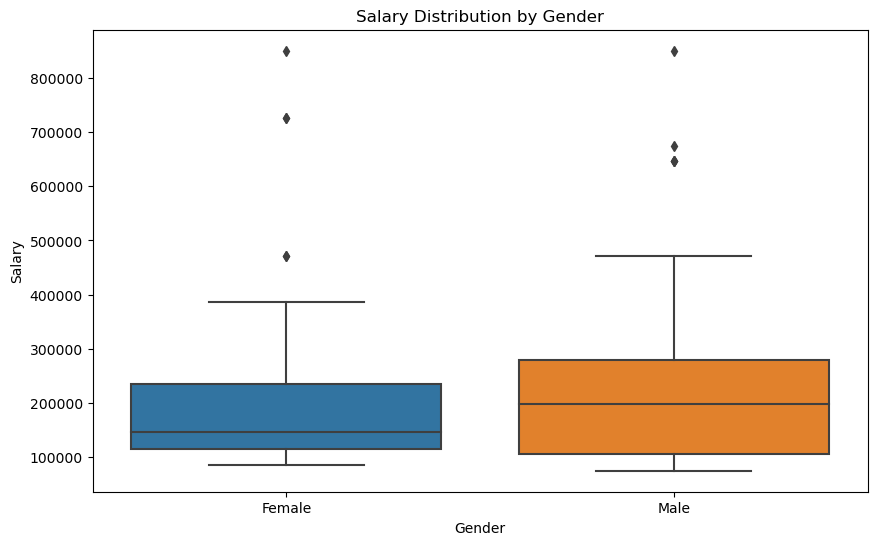

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.figure(figsize=(10, 6))

# Simple box plot for Salary distribution by Gender
sns.boxplot(x='Gender', y='Salary', data=df)

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.title('Salary Distribution by Gender')

# plt.legend(title = 'Gender', labels=['Male','Female'])
# Show the plot
plt.show()


In [100]:
print('-'*40)
print("Mean Salary Gender wise")
print(df.groupby('Gender')['Salary'].mean().round(2))
print('-'*40)

print("Median Salary Gender wise")
print(df.groupby('Gender')['Salary'].median().round(2))
print('-'*40)

print("Standard Deviation Salary Gender wise")
print(df.groupby('Gender')['Salary'].std().round(2))
print('-'*40)



----------------------------------------
Mean Salary Gender wise
Gender
Female    214446.23
Male      241693.62
Name: Salary, dtype: float64
----------------------------------------
Median Salary Gender wise
Gender
Female    145600.0
Male      198000.0
Name: Salary, dtype: float64
----------------------------------------
Standard Deviation Salary Gender wise
Gender
Female    168733.42
Male      181636.04
Name: Salary, dtype: float64
----------------------------------------


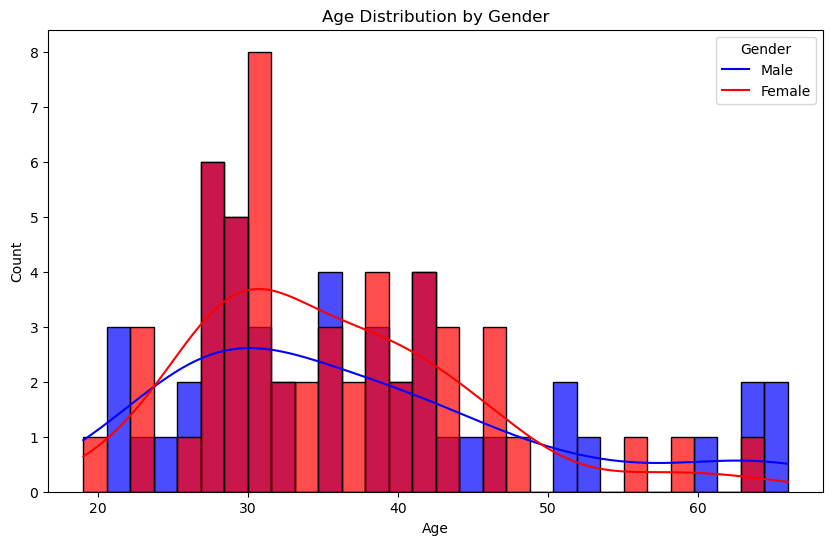

In [101]:
plt.figure(figsize = (10,6))
color_pallete = {'Male': 'Blue','Female':'Red'}
sns.histplot(data = df, x = 'Age', hue = 'Gender', kde = True, bins = 30, alpha =0.7,palette = color_pallete)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title("Age Distribution by Gender")

plt.legend(title ='Gender', labels=['Male','Female'])
plt.show()

Age Distribution:

The histograms display the distribution of ages for both genders.
Central Tendency:

Identify the central tendency of the age distribution, which could be inferred from the peaks in the histograms.
Spread:

Assess the spread or variability in the age distribution.
Comparison between Genders:

Compare the shapes of the histograms to identify any differences in the age distribution between genders.
Skewness:

Evaluate the skewness of each distribution. A symmetric distribution will have a similar shape on both sides of the central peak.
Kernel Density Estimation (KDE):

The overlaid KDE plots provide a smoothed representation of the age distribution.
Peak Ages:

Identify any peaks in the distributions that may indicate common or prevalent ages for each gender.
Outliers:

Check for the presence of outliers or unusual patterns in the age distribution.

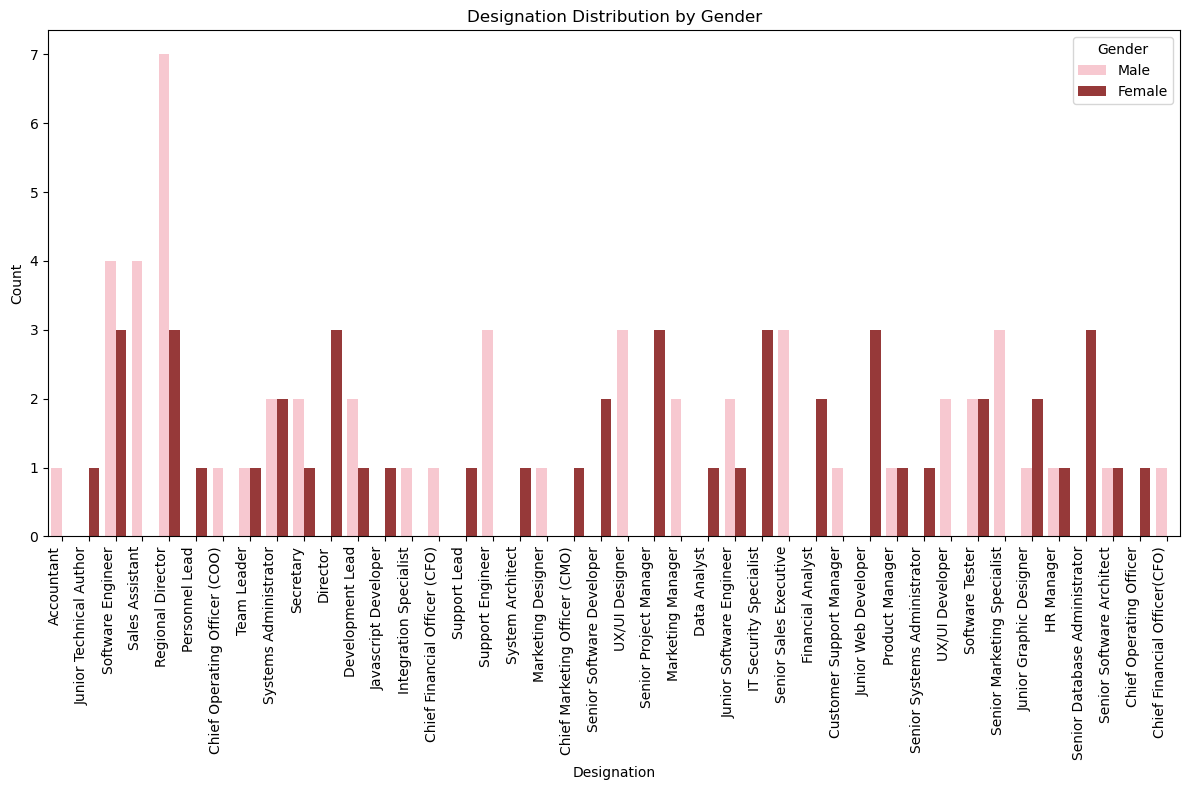

In [102]:
plt.figure(figsize = (12,8))
sns.countplot(data = df, x = 'Designation', hue = 'Gender', palette = {'Male': 'Brown', 'Female':'pink'})
plt.xlabel('Designation')
plt.ylabel('Count')
plt.title('Designation Distribution by Gender')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Show the legend with specified labels
plt.legend(title='Gender', labels=['Male', 'Female'])

# Show the plot
plt.tight_layout()
plt.show()

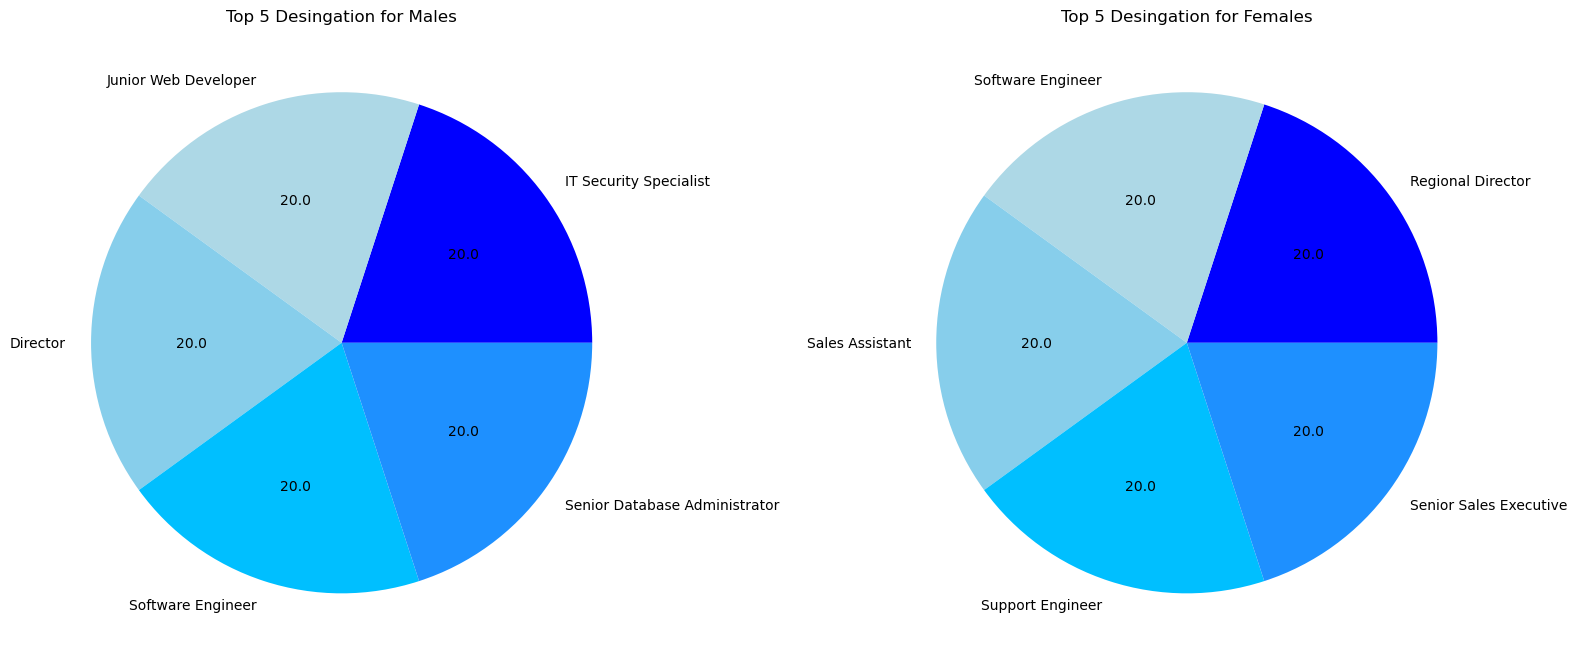

In [103]:
plt.figure(figsize = (16,8))


top_male = df[df['Gender'] == 'Male']['Designation'].value_counts().nlargest(5)
plt.subplot(1,2,1)
plt.pie(top_male, labels = top_male.index, autopct = '%1.1f', startangle = 0, colors=['blue', 'lightblue', 'skyblue', 'deepskyblue', 'dodgerblue'])
plt.title("Top 5 Desingation for Males")


top_female = df[df['Gender'] == 'Female']['Designation'].value_counts().nlargest(5)
plt.subplot(1,2,2)
plt.pie(top_male, labels = top_female.index, autopct = '%1.1f', startangle = 0, colors=['blue', 'lightblue', 'skyblue', 'deepskyblue', 'dodgerblue'])
plt.title("Top 5 Desingation for Females")

# adjust the layout for eliminating overwriting of text.
plt.tight_layout()

# show the plot
plt.show()

In [117]:
print("Top 10 Highest Paid Male Employees")
top_salaried_employees = df[df['Gender']=='Male'].nlargest(10,'Salary')
top_salaried_employees

Top 10 Highest Paid Male Employees


,Name,Gender,Start date,Age,Designation,Office Location,Salary,Email,Work Experience
67,Henry Turner,Male,2010-05-30,64,Chief Operating Officer,San Francisco,850000,henryturner@gmail.com,14 Years
27,Yuri Berry,Male,2009-06-25,40,Chief Marketing Officer (CMO),New York,675000,yuriberry@gmail.com,15 Years
13,Jackson Bradshaw,Male,2008-09-26,65,Director,New York,645750,jacksonbradshaw@gmail.com,15 Years
55,Liam Powell,Male,2010-06-27,63,Director,New York,645750,liampowell@gmail.com,14 Years
87,Kai Ramirez,Male,2010-04-10,24,Director,Singapore,645750,kairamirez@gmail.com,14 Years
63,Mason Sullivan,Male,2010-09-12,51,Regional Director,London,470600,masonsullivan@gmail.com,13 Years
79,Gideon Barrett,Male,2011-08-03,35,Regional Director,San Francisco,356250,gideonbarrett@gmail.com,12 Years
65,Jackson Barrett,Male,2012-08-06,35,Development Lead,New York,345000,jacksonbarrett@gmail.com,11 Years
20,Quinn Flynn,Male,2013-03-03,22,Support Lead,Edinburgh,342000,quinnflynn@gmail.com,11 Years
25,Tiger Nixon,Male,2011-04-25,61,System Architect,Edinburgh,320800,tigernixon@gmail.com,13 Years


In [119]:
print("Top 10 Highest Paid Female Employees")
top_salaried_employees = df[df['Gender']=='Female'].nlargest(10,'Salary')
top_salaried_employees

Top 10 Highest Paid Female Employees


,Name,Gender,Start date,Age,Designation,Office Location,Salary,Email,Work Experience
8,Fiona Green,Female,2010-03-11,48,Chief Operating Officer (COO),San Francisco,850000,fionagreen@gmail.com,14 Years
19,Paul Byrd,Female,2010-06-09,64,Chief Financial Officer (CFO),New York,725000,paulbyrd@gmail.com,14 Years
78,Amara Wells,Female,2010-12-12,44,Chief Financial Officer(CFO),New York,725000,amarawells@gmail.com,13 Years
5,Charde Marshall,Female,2008-10-16,36,Regional Director,San Francisco,470600,chardemarshall@gmail.com,15 Years
84,Layla Wallace,Female,2012-09-14,29,Regional Director,London,470600,laylawallace@gmail.com,11 Years
24,Tatyana Fitzpatrick,Female,2010-03-17,19,Regional Director,London,385750,tatyanafitzpatrick@gmail.com,14 Years
92,Eva Ramirez,Female,2011-03-18,40,Regional Director,London,385750,evaramirez@gmail.com,13 Years
15,Jennifer Chang,Female,2010-11-14,28,Regional Director,Singapore,357650,jenniferchang@gmail.com,13 Years
11,Hermione Butler,Female,2011-03-21,47,Regional Director,London,356250,hermionebutler@gmail.com,13 Years
14,Jenette Caldwell,Female,2011-09-03,30,Development Lead,New York,345000,jenettecaldwell@gmail.com,12 Years


In [106]:
import numpy as np
date_string = "01-01-2024"

# Convert the date_string to a Timestamp
date_series = pd.to_datetime(date_string, format="%d-%m-%Y")

# Convert 'Start date' column to Timestamp
df['Start date'] = pd.to_datetime(df['Start date'], format="%d-%m-%Y")

# Calculate the Work Experience
df['Work Experience'] = (date_series - df['Start date']) / np.timedelta64(1, 'Y')

df['Work Experience'] = (df['Work Experience'].round()).astype(int).astype(str) + " Years"




df


,Name,Gender,Start date,Age,Designation,Office Location,Salary,Email,Work Experience
0,Airi Satou,Female,2008-11-28,33,Accountant,Tokyo,162700,airisatou@gmail.com,15 Years
1,Ashton Cox,Male,2009-01-12,66,Junior Technical Author,San Francisco,86000,ashtoncox@gmail.com,15 Years
2,Brenden Wagner,Male,2011-06-07,28,Software Engineer,San Francisco,206850,brendenwagner@gmail.com,13 Years
3,Bruno Nash,Male,2011-05-03,38,Software Engineer,London,163500,brunonash@gmail.com,13 Years
4,Cara Stevens,Female,2011-12-06,46,Sales Assistant,New York,145600,carastevens@gmail.com,12 Years
...,...,...,...,...,...,...,...,...,...
95,Noah Simmons,Male,2010-06-25,44,Systems Administrator,Edinburgh,103500,noahsimmons@gmail.com,14 Years
96,Sophia Harrison,Female,2013-09-14,26,UX/UI Designer,San Francisco,115000,sophiaharrison@gmail.com,10 Years
97,Owen Dean,Male,2011-12-20,42,HR Manager,New York,155000,owendean@gmail.com,12 Years
98,Zoe Bennett,Female,2012-05-03,31,Senior Sales Executive,London,168500,zoebennett@gmail.com,12 Years


In [107]:
Male_employees = df[df['Gender']=='Male']

Female_employees = df[df['Gender']=='Female']


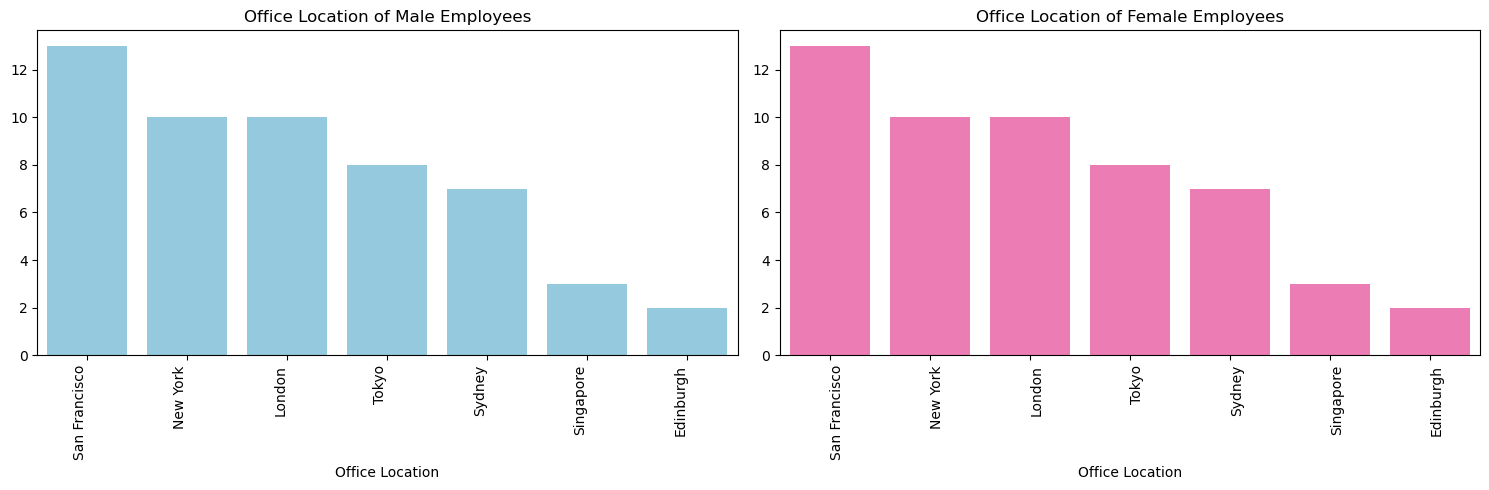

In [108]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
office_order = Male_employees['Office Location'].value_counts().index
sns.countplot(Male_employees, x ='Office Location', order = office_order, color = 'skyblue')
plt.xticks(rotation=90, ha='right')
plt.title("Office Location of Male Employees")
plt.ylabel('')


plt.subplot(1,2,2)
office_order = Female_employees['Office Location'].value_counts().index
sns.countplot(Female_employees, x ='Office Location', order = office_order, color = 'hotpink')
plt.xticks(rotation=90, ha='left')
plt.title("Office Location of Female Employees")
plt.ylabel('')


plt.tight_layout()
plt.show()

c:\Users\zeus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Scatter Plot for Age and Salary for Male Employees')

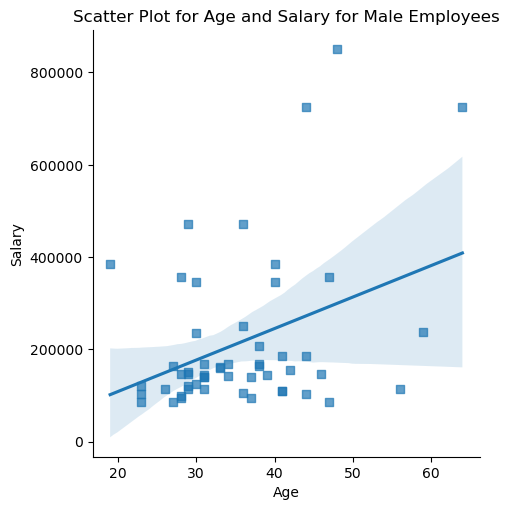

In [109]:

sns.lmplot(Male_employees, x='Age', y='Salary', markers=['s'], scatter_kws={'alpha':0.7})
plt.title("Scatter Plot for Age and Salary for Male Employees")


c:\Users\zeus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Scatter Plot for Age and Salary for Female Employees')

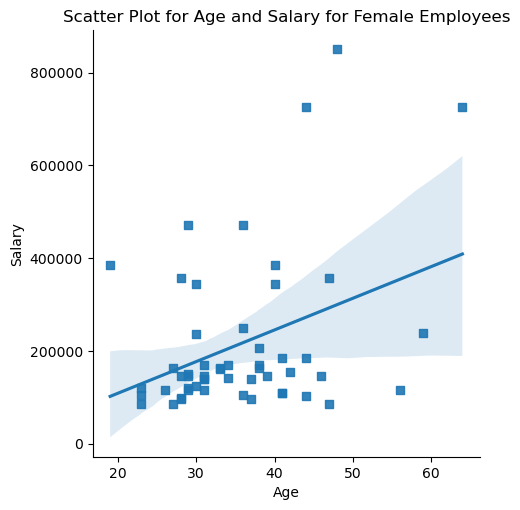

In [110]:
sns.lmplot(Female_employees, x='Age', y='Salary', markers=['s'],palette = {'Female':'Purple'}, scatter_kws={'alpha': 0.9})

plt.title("Scatter Plot for Age and Salary for Female Employees")


In [111]:
Male_employees.groupby('Office Location').agg({'Salary':'mean'}).round(1).rename(columns = {'Salary': 'Average Salary'}).sort_values(by= 'Average Salary',ascending=False)


,Average Salary
Office Location,
New York,311855.0
London,250885.0
Singapore,216083.3
San Francisco,201894.2
Tokyo,161471.9
Sydney,138071.4
Edinburgh,103550.0


In [112]:
Female_employees.groupby('Office Location').agg({'Salary':'mean'}).round(1).rename(columns = {'Salary': 'Average Salary'}).sort_values(by = 'Average Salary',ascending=False)


,Average Salary
Office Location,
New York,311855.0
London,250885.0
Singapore,216083.3
San Francisco,201894.2
Tokyo,161471.9
Sydney,138071.4
Edinburgh,103550.0


C:\Users\zeus\AppData\Local\Temp\ipykernel_12760\1920055677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Male_employees['Start Year']= Male_employees['Start date'].dt.year


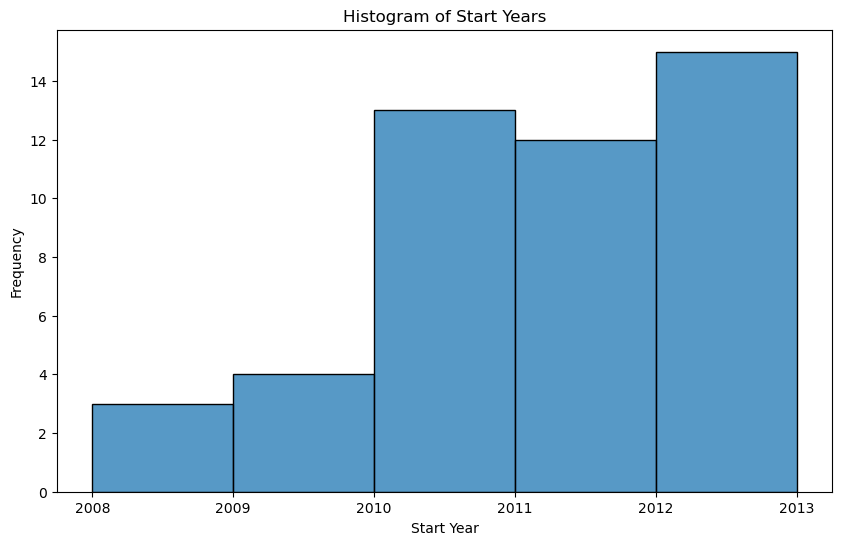

In [121]:
Male_employees['Start Year']= Male_employees['Start date'].dt.year


plt.figure(figsize = (10,6))

sns.histplot(data = Male_employees, x= 'Start Year',bins = range(Male_employees['Start Year'].min(), Male_employees['Start Year'].max()+1),edgecolor = 'Black')
plt.xlabel('Start Year')
plt.ylabel('Frequency')
plt.title('Histogram of Start Years')
plt.show()

C:\Users\zeus\AppData\Local\Temp\ipykernel_12760\3015620902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Female_employees['Start Year']= Female_employees['Start date'].dt.year


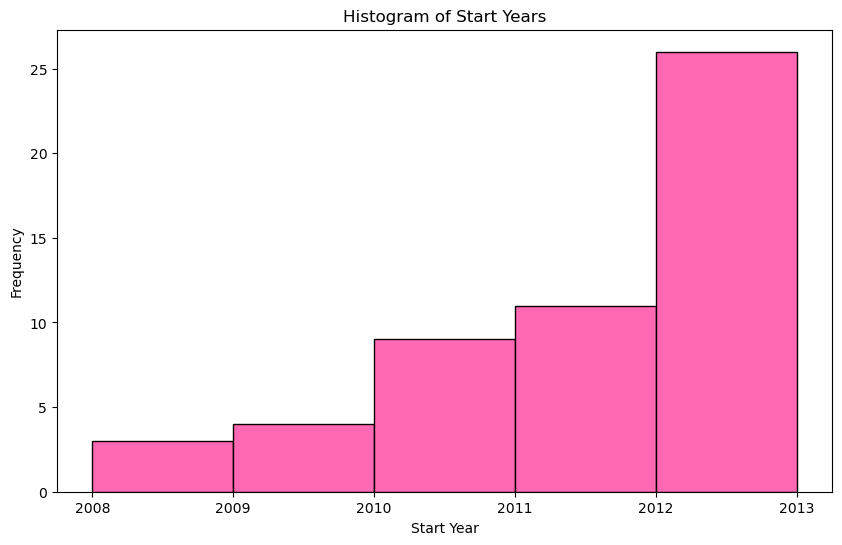

In [116]:
Female_employees['Start Year']= Female_employees['Start date'].dt.year

plt.figure(figsize = (10,6))
plt.hist(data = Female_employees, x= 'Start Year',bins = range(Female_employees['Start Year'].min(), Female_employees['Start Year'].max()+1),edgecolor = 'Black',color='hotpink')
plt.xlabel('Start Year')
plt.ylabel('Frequency')
plt.title('Histogram of Start Years')
plt.show()